In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

data_path = '/content/drive/MyDrive/mha/intents.json'
df = pd.read_json(data_path)



In [3]:
df

,intents
0,"{'tag': 'greeting', 'patterns': ['Hi', 'Hey', ..."
1,"{'tag': 'morning', 'patterns': ['Good morning'..."
2,"{'tag': 'afternoon', 'patterns': ['Good aftern..."
3,"{'tag': 'evening', 'patterns': ['Good evening'..."
4,"{'tag': 'night', 'patterns': ['Good night'], '..."
...,...
75,"{'tag': 'fact-28', 'patterns': ['What do I do ..."
76,"{'tag': 'fact-29', 'patterns': ['How do I know..."
77,"{'tag': 'fact-30', 'patterns': ['How can I mai..."
78,"{'tag': 'fact-31', 'patterns': ['What's the di..."


In [4]:
import pandas as pd

data_path = '/content/drive/MyDrive/mha/intents.json'
df = pd.read_json(data_path, orient='records')


In [5]:
print(df.columns)



Index(['intents'], dtype='object')


In [6]:
print(df.head())


                                             intents
0  {'tag': 'greeting', 'patterns': ['Hi', 'Hey', ...
1  {'tag': 'morning', 'patterns': ['Good morning'...
2  {'tag': 'afternoon', 'patterns': ['Good aftern...
3  {'tag': 'evening', 'patterns': ['Good evening'...
4  {'tag': 'night', 'patterns': ['Good night'], '...


In [7]:
import pandas as pd

# Assuming df is your original DataFrame with 'intents' column
# Extract the data from the 'intents' column
intents_data = df['intents'].explode()

# Create a new DataFrame from the extracted data
df_expanded = pd.DataFrame(list(intents_data))

# Display the expanded DataFrame
print(df_expanded)


             0
0          tag
1     patterns
2    responses
3          tag
4     patterns
..         ...
235   patterns
236  responses
237        tag
238   patterns
239  responses

[240 rows x 1 columns]


In [8]:
import pandas as pd
import json

# Load the data from the JSON file
data_path = '/content/drive/MyDrive/mha/intents.json'
with open(data_path, 'r') as file:
    data = json.load(file)

# Create a DataFrame from the loaded data
df = pd.DataFrame(data)

# Extract data from the 'intents' column
intents_data = df['intents'].apply(pd.Series)

# Create a new DataFrame with expanded data
df_expanded = pd.concat([intents_data['tag'], intents_data['patterns'].explode(), intents_data['responses']], axis=1)
df_expanded.columns = ['tag', 'patterns', 'responses']

print(df_expanded)


         tag                                           patterns  \
0   greeting                                                 Hi   
0   greeting                                                Hey   
0   greeting                                   Is anyone there?   
0   greeting                                           Hi there   
0   greeting                                              Hello   
..       ...                                                ...   
76   fact-29                       How do I know if I'm unwell?   
77   fact-30  How can I maintain social connections? What if...   
78   fact-31  What's the difference between anxiety and stress?   
79   fact-32  What's the difference between sadness and depr...   
79   fact-32          difference between sadness and depression   

                                            responses  
0   [Hello there. Tell me how are you feeling toda...  
0   [Hello there. Tell me how are you feeling toda...  
0   [Hello there. Tell me h

In [9]:
df_expanded['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
       'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'friends', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'pandora-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
       'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
       'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15',
       'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21',
       'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27',
       'fact-28', 'fact-29', '

In [ ]:
import plotly.graph_objects as go

intent_counts = df_expanded['tag'].value_counts()
fig = go.Figure(data=[go.Bar(x=intent_counts.index, y=intent_counts.values)])
fig.update_layout(title='Distribution of Intents', xaxis_title='Intents', yaxis_title='Count')
fig.show()

: 

In [11]:
df_expanded['pattern_count'] = df_expanded['patterns'].apply(lambda x: len(x))
df_expanded['response_count'] = df_expanded['responses'].apply(lambda x: len(x))
avg_pattern_count = df_expanded.groupby('tag')['pattern_count'].mean()
avg_response_count = df_expanded.groupby('tag')['response_count'].mean()

fig = go.Figure()
fig.add_trace(go.Bar(x=avg_pattern_count.index, y=avg_pattern_count.values, name='Average Pattern Count'))
fig.add_trace(go.Bar(x=avg_response_count.index, y=avg_response_count.values, name='Average Response Count'))
fig.update_layout(title='Pattern and Response Analysis', xaxis_title='Intents', yaxis_title='Average Count')
fig.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import plotly.graph_objects as go

In [13]:
# Split the dataset into training and testing sets
X = df_expanded['patterns']
y = df_expanded['tag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
model = SVC()
model.fit(X_train_vec, y_train)

# Predict intents for the testing set
y_pred = model.predict(X_test_vec)

# Evaluate the model's performance
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Convert float values in the report to dictionaries
report = {label: {metric: report[label][metric] for metric in report[label]} for label in report if isinstance(report[label], dict)}

# Extract evaluation metrics
labels = list(report.keys())
evaluation_metrics = ['precision', 'recall', 'f1-score']
metric_scores = {metric: [report[label][metric] for label in labels if label in report] for metric in evaluation_metrics}

# Visualize the model's performance using a Plotly bar plot
fig = go.Figure()
for metric in evaluation_metrics:
    fig.add_trace(go.Bar(name=metric, x=labels, y=metric_scores[metric]))

fig.update_layout(title='Intent Prediction Model Performance',
                  xaxis_title='Intent',
                  yaxis_title='Score',
                  barmode='group')

fig.show()

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df_expanded['patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 232,
 'word_counts': '{"hi": 2, "hey": 2, "is": 13, "anyone": 2, "there": 5, "hello": 1, "howdy": 1, "hola": 1, "bonjour": 1, "konnichiwa": 1, "guten": 1, "tag": 1, "ola": 1, "good": 5, "morning": 1, "afternoon": 1, "evening": 1, "night": 1, "bye": 3, "see": 2, "you": 38, "later": 1, "goodbye": 1, "au": 1, "revoir": 1, "sayonara": 1, "ok": 4, "then": 1, "fare": 1, "thee": 1, "well": 2, "thanks": 2, "thank": 3, "that\'s": 3, "helpful": 1, "for": 10, "the": 10, "help": 6, "than": 1, "very": 3, "much": 4, "nothing": 3, "who": 6, "are": 15, "what": 29, "tell": 6, "me": 19, "more": 6, "about": 20, "yourself": 3, "your": 3, "name": 4, "should": 3, "i": 95, "call": 1, "what\'s": 3, "can": 16, "do": 14, "created": 2, "how": 8, "were": 2, "made": 1, "my": 13, "am": 17, "go": 4, "by": 1, "could": 2, "give": 1, "a": 12, "hand": 1, "ple

In [15]:
vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)

number of unique words =  303


In [16]:
import pickle

# Save tokenizer to a file
tokenizer_path = '/content/drive/MyDrive/mha/tokenizer.pkl'
with open(tokenizer_path, 'wb') as file:
    pickle.dump(tokenizer, file)


In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import numpy as np


ptrn2seq = tokenizer.texts_to_sequences(df_expanded['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df_expanded['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

X shape =  (232, 18)
y shape =  (232,)
num of classes =  80


In [18]:
lbl_enc_path = '/content/drive/MyDrive/mha/label_encoder.pkl'
with open(lbl_enc_path, 'wb') as file:
    pickle.dump(lbl_enc, file)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 100)           30400     
                                                                 
 lstm (LSTM)                 (None, 18, 32)            17024     
                                                                 
 layer_normalization (Layer  (None, 18, 32)            64        
 Normalization)                                                  
                                                                 
 lstm_1 (LSTM)               (None, 18, 32)            8320      
                                                                 
 layer_normalization_1 (Lay  (None, 18, 32)            64        
 erNormalization)                                                
                                                                 
 lstm_2 (LSTM)               (None, 32)                8

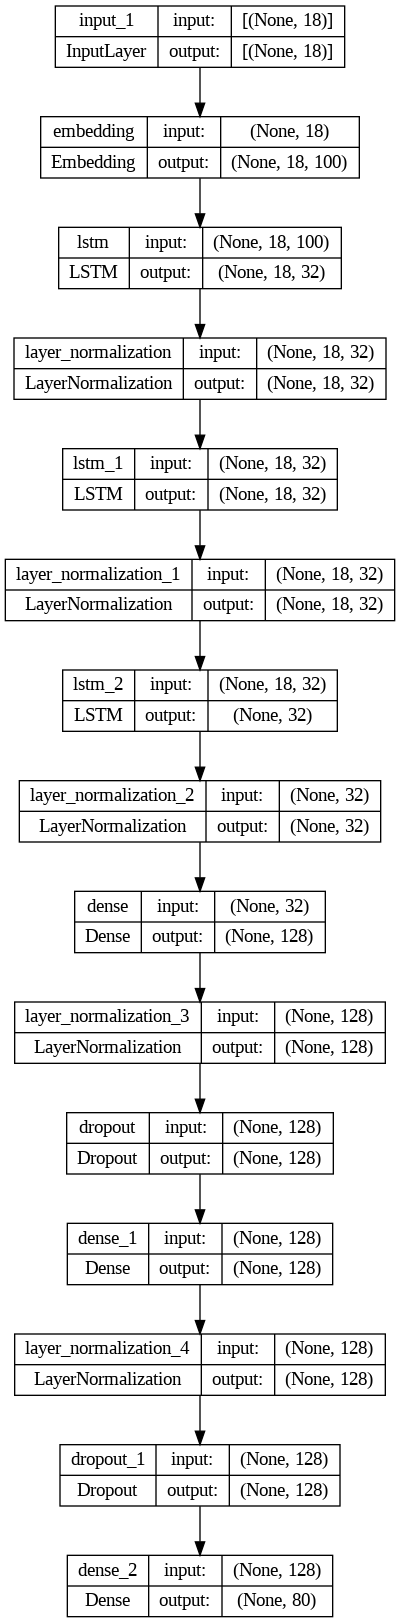

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Input(shape=(X.shape[1])))
model.add(Embedding(input_dim=vacab_size+1, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [21]:
model_history = model.fit(x=X,
                          y=y,
                          batch_size=10,
                          epochs=50)


Epoch 1/50
24/24 [==============================] - 17s 59ms/step - loss: 4.9271 - accuracy: 0.0129
Epoch 2/50
24/24 [==============================] - 1s 35ms/step - loss: 3.7761 - accuracy: 0.0991
Epoch 3/50
24/24 [==============================] - 1s 35ms/step - loss: 2.8894 - accuracy: 0.3103
Epoch 4/50
24/24 [==============================] - 1s 34ms/step - loss: 2.3406 - accuracy: 0.4526
Epoch 5/50
24/24 [==============================] - 1s 36ms/step - loss: 1.9632 - accuracy: 0.5603
Epoch 6/50
24/24 [==============================] - 1s 35ms/step - loss: 1.5934 - accuracy: 0.6336
Epoch 7/50
24/24 [==============================] - 1s 35ms/step - loss: 1.3642 - accuracy: 0.7112
Epoch 8/50
24/24 [==============================] - 1s 35ms/step - loss: 1.0790 - accuracy: 0.7974
Epoch 9/50
24/24 [==============================] - 1s 35ms/step - loss: 0.9014 - accuracy: 0.8534
Epoch 10/50
24/24 [==============================] - 1s 35ms/step - loss: 0.7830 - accuracy: 0.8362
Epoch 11

In [22]:
# Train the model
# model_history = model.fit(x=X, y=y, batch_size=10, epochs=50)

# Get the training accuracy from the history object
training_accuracy = model_history.history['accuracy'][-1]

# Convert training accuracy to percentage
training_accuracy_percentage = training_accuracy * 100

print("Training Accuracy:", training_accuracy_percentage, "%")


Training Accuracy: 99.56896305084229 %


In [23]:
# Save the model to a file
model_path = '/content/drive/MyDrive/mha/model.h5'
model.save(model_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [24]:
import re
import random

def generate_answer(pattern):
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df_expanded[df_expanded['tag'] == tag]['responses'].values[0]

    print("you: {}".format(pattern))
    print("model: {}".format(random.choice(responses)))


In [25]:
generate_answer('Hi! How are you?')


1/1 [==============================] - 6s 6s/step
you: Hi! How are you?
model: The real question is: Who created you?


In [26]:
generate_answer('i am not feeling well')

1/1 [==============================] - 0s 25ms/step
you: i am not feeling well
model: That's no problem. I can see why you'd be stressed out about that. I can suggest you some tips to alleviate this issue. Would you like to learn more about that?


In [27]:
generate_answer('nobody loves me')

1/1 [==============================] - 0s 24ms/step
you: nobody loves me
model: I'm trying my best to help you. So please talk to me


In [28]:
generate_answer('i feel very depressed')

1/1 [==============================] - 0s 24ms/step
you: i feel very depressed
model: Talk to me. Tell me more. It helps if you open up yourself to someone else.


In [37]:
import re
import random

def generate_answer(pattern, negative_count):
    # Preprocess the user input pattern
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    # Tokenize and pad the input pattern
    x_test = tokenizer.texts_to_sequences(text)
    if not x_test:  # Check if x_test is empty
        return negative_count  # Return without processing if input is empty

    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])

    # Predict the intent using the model
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]

    # Retrieve responses associated with the predicted intent
    responses = df_expanded[df_expanded['tag'] == tag]['responses'].values[0]

    negative_words= ["no", "not", "don't", "can't","didn't","won't", "wouldn't", "shouldn't", "couldn't", "isn't", "aren't", "wasn't", "weren't", "haven't", "hasn't", "hadn't", "never", "nowhere", "nothing", "nobody", "none", "neither", "nor"]
    # Check if the response is negative
    is_negative = any(response.lower() in pattern.lower() for response in negative_words )

    if is_negative:
        negative_count += 1
    else:
        negative_count = 0

    # If there have been 4-5 consecutive negative messages, suggest doctor help
    if negative_count >= 1:
        print("Chatbot: It seems like you might need professional help. Would you like me to provide you with the contact information of a doctor?")
        response = input("User: ")
        if response.lower() in ["yes", "y"]:
            print("Chatbot: Here is the contact information of a doctor: [Contact Number]")
            return True  # Return True to indicate conversation should stop
        negative_count = 0
    else:
        print("you: {}".format(pattern))
        print("model: {}".format(random.choice(responses)))

    return False  # Return False to indicate conversation should continue

# Interactive chat loop
negative_count = 0
stop_conversation = False
while not stop_conversation:
    user_input = input("User: ")
    stop_conversation = generate_answer(user_input, negative_count)


User: how are you
1/1 [==============================] - 0s 50ms/step
you: how are you
model: I was created by >.
User: good morning
1/1 [==============================] - 0s 26ms/step
you: good morning
model: Good morning. I hope you had a good night's sleep. How are you feeling today? 
User: no i did,nt sleep yesterday
1/1 [==============================] - 0s 28ms/step
Chatbot: It seems like you might need professional help. Would you like me to provide you with the contact information of a doctor?
User: yes
Chatbot: Here is the contact information of a doctor: [Contact Number]


**dont touch this code i am adding something in this so please ❌**

In [34]:
import re
import random
import datetime

def generate_greeting():
    current_hour = datetime.datetime.now().hour
    if 5 <= current_hour < 12:
        return "Good morning! How can I assist you today?"
    elif 12 <= current_hour < 18:
        return "Good afternoon! How can I assist you today?"
    else:
        return "Good evening! How can I assist you today?"

def generate_answer(pattern, negative_count):
    # Preprocess the user input pattern
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    # Tokenize and pad the input pattern
    x_test = tokenizer.texts_to_sequences(text)
    if not x_test:  # Check if x_test is empty
        return negative_count  # Return without processing if input is empty

    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])

    # Predict the intent using the model
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]

    # Retrieve responses associated with the predicted intent
    responses = df_expanded[df_expanded['tag'] == tag]['responses'].values[0]

    negative_words= ["no", "not", "don't", "can't","didn't","won't", "wouldn't", "shouldn't", "couldn't", "isn't", "aren't", "wasn't", "weren't", "haven't", "hasn't", "hadn't", "never", "nowhere", "nothing", "nobody", "none", "neither", "nor"]
    # Check if the response is negative
    is_negative = any(response.lower() in pattern.lower() for response in negative_words )

    if is_negative:
        negative_count += 1
    else:
        negative_count = 0

    # If there have been 4-5 consecutive negative messages, suggest doctor help
    if negative_count >= 1:
        print("Chatbot: It seems like you might need professional help. Would you like me to provide you with the contact information of a doctor?")
        response = input("User: ")
        if response.lower() in ["yes", "y"]:
            print("Chatbot: Here is the contact information of a doctor: [Contact Number]")
            return True  # Return True to indicate conversation should stop
        negative_count = 0
    else:
        print("Model: {}".format(random.choice(responses)))

    return False, negative_count  # Return False to indicate conversation should continue

# Interactive chat loop
negative_count = 0
stop_conversation = False
print(generate_greeting())  # Model speaks first
while not stop_conversation:
    user_input = input("User: ")
    stop_conversation, negative_count = generate_answer(user_input, negative_count)


Good morning! How can I assist you today?
User: good morning
1/1 [==============================] - 0s 27ms/step
Model: Good morning. I hope you had a good night's sleep. How are you feeling today? 
User: i am feeling good and what about you
1/1 [==============================] - 0s 26ms/step
Model: Okay we're done. Have a great day
User: thank you
1/1 [==============================] - 0s 26ms/step
Model: Happy to help!
User: no i don't want any help
1/1 [==============================] - 0s 35ms/step
Chatbot: It seems like you might need professional help. Would you like me to provide you with the contact information of a doctor?


KeyboardInterrupt: Interrupted by user

In [ ]:
import re
import random

def generate_answer(pattern):
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df_expanded[df_expanded['tag'] == tag]['responses'].values[0]

    print("you: {}".format(pattern))
    print("model: {}".format(random.choice(responses)))

: 

In [ ]:
generate_answer("Who are you ?")

: 